In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#defining all important constants and elements used 56Ni28, 54Fe26, 56Fe26,4He2, 2H1
#All units are S.I
eV = 6.24E18
A_Ni = 56
A_Fe1 = 54
A_Fe2 = 52
A_He = 4
A_H = 1
A_n = 1
Z_Ni = 28
Z_Fe = 26
Z_He = 2
Z_H = 1
Z_n = 0
N_A = 6.023E23
k = 1.38e-23
h = 6.63E-34*eV/1E6
amu = 1.66E-27
c = 299792458
M_Ni = 55.942*amu*eV/1E6
M_Fe1 = 53.939*amu*eV/1E6
M_Fe2 = 51.948*amu*eV/1E6
M_He = 4.003*amu*eV/1E6
M_H = 1.008*amu*eV/1E6
M_n = 1.008*amu*eV/1E6
  
mp = 1.673E-27*eV/1E6
mn = 1.675E-27*eV/1E6



rho = 1E10   #kg/m^3
T = np.linspace(3,10,100)*1E9
Ye = 0.5
beta = 1/(k*T*eV/1E6)
# Easy to put things into an array I believe
A = np.array([A_Ni,A_Fe1,A_Fe2,A_He,A_H,A_n])
Z = np.array([Z_Ni,Z_Fe,Z_Fe,Z_He,Z_H,Z_n])
M = np.array([M_Ni,M_Fe1,M_Fe2,M_He,M_H,M_n])
#print(rho)

# numbers 1,2,3,4,5 are attributed to Ni, Fe1, Fe2, He, H respectively
#print(beta)
#print(A)
#print(Z)
print(M)
#print(h)

[5.79469613e-13 5.58721738e-13 5.38098163e-13 4.14646752e-14
 1.04412672e-14 1.04412672e-14]


In [3]:
# calculating BInding Energies
BE = (Z*mp + (A-Z)*mn - M)*c**2
BE[4] = 0
BE[5] = 0
#print(BE)
print(BE)

[493.68147425 481.89296993 456.6895739   28.61320127   0.
   0.        ]


In [4]:
#calculating the partition function
part = 1 

In [5]:
#Mass Fractions
X_Ni = 1
X_Fe2 = 0
X_Fe1 = 0
X_He = 0
X_H = 0
X_n = 0
X = np.zeros((len(T), 6))
X[0,:] = [X_Ni, X_Fe1, X_Fe2, X_He, X_H, X_n] 
print(X)
#X = fac1*fac2*fac3

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

In [6]:
#Defining Functions

def Mass_Function(A,Z,M,mup,mun,beta,BE):
    fac1 = A*part/(N_A*rho)
    fac2 = (2*np.pi*M/(beta*h**2))**1.5
    fac3 = np.exp(beta*(BE + Z*mup + (A-Z)*mun))
    fac4 = beta*(BE + Z*mup + (A-Z)*mun)
    #print(fac1, fac2, fac3,fac4)
    x = fac1*fac2*fac3
    return x

In [7]:
#Initial Guess for the chemical potentials of proton and neutron

# Taking the X_Ni to be 1, to solve for the initial guess of mu.

mup = np.zeros(100)
mun = np.zeros(100)
frac1 = N_A*rho/(A[0]*part)
frac2 = (beta[0]*h**2/(2*np.pi*M[0]))**1.5
mu = ((np.log(frac1*frac2)/(beta[0])) - BE[0])/A[0]
print(frac1,frac2 ,mu)
print(A[2])
mup[0] = mu
mun[0] = mu
#X = Mass_Function(A[0],Z[0],M[0],mu,mu,beta[0],BE[0])
#print(X)

1.0755357142857142e+32 7.762491820659563e-44 -8.933416806162331
52


In [8]:


for i in range(100):
    
    count = 1
    
    for lol in range(100):
        if count == 1:
            mup_ig = mup[i-1]
            mun_ig = mun[i-1]
            if i == 0:
                mup_ig = mup[0]
                mun_ig = mun[0]
        #f1 = X + X*X*Y*Y -2*Y + 3
        #f2 = Y - X*X*X + 2*X*Y*Y - 2
        #print(i)
        for j in range(6):
            if i>0:
                X[i,j] = Mass_Function(A[j],Z[j],M[j],mup_ig,mun_ig,beta[i],BE[j])
                print(X[i,j])
        
        f1 = sum(X[i])-1
        print(X[i])
        #print(f1) 
        f2 = sum(Z*X[i]/A)-Ye
        #print(f2)
        if abs(f1)<=1E-2 and abs(f2) <= 1E-5:
            break
        print ("\r\nIteration=%d" %count)
        count += 1
        #print ("f1= %f" %(f1))
        #print ("f2=%f" %(f2))
        #A = 1 + 2*X*Y*Y
        #B = 2*Y*X*X -2
        #C = -3*X*X + 2*Y*Y
        #D = 1 + 4*X*Y    
        Ax = beta[i]*sum(Z*X[i])
        Bx = beta[i]*sum((A-Z)*X[i])
        Cx = beta[i]*sum(X[i]*Z**2/A)
        Dx = Ax-Cx
        #print (Ax,Bx)
        #print (Cx,Dx)
        Jx = np.matrix([[Ax,Bx],[Cx,Dx]]).I  #Jacobian matrix
        f3 = np.matrix([[f1],[f2]])
        Tx = np.matrix([[mup_ig],[mun_ig]])
        Delta = Jx*f3
        E = Tx-Delta
        mup_ig = np.squeeze(np.asarray(E[0]))
        mun_ig = np.squeeze(np.asarray(E[1]))
        #print (J)
        #print (Delta)
        #print E    
        #print ("mup=%f, mun=%f" %(mup_ig,mun_ig))
    
    mup[i] = mup_ig
    mun[i] = mun_ig
    for j in range(6):
        X[i,j] = Mass_Function(A[j],Z[j],M[j],mup[i],mun[i],beta[i],BE[j])
    
       



[1. 0. 0. 0. 0. 0.]
1.8632444650312459
16362400806.146414
0.013282920804548109
0.00034249218708837465
1.1391736074047932e-08
1.1391736074047932e-08
[1.86324447e+00 1.63624008e+10 1.32829208e-02 3.42492187e-04
 1.13917361e-08 1.13917361e-08]

Iteration=1
1.1661990503425246
6018119315.740652
0.008596703300475546
0.00033121893596575866
1.4860535271904712e-08
8.58771495332445e-09
[1.16619905e+00 6.01811932e+09 8.59670330e-03 3.31218936e-04
 1.48605353e-08 8.58771495e-09]

Iteration=2
1.0049101911277925
2213985671.4010634
0.0074869345428842425
0.0003277159859636586
2.2743365480479646e-08
5.581469780636761e-09
[1.00491019e+00 2.21398567e+09 7.48693454e-03 3.27715986e-04
 2.27433655e-08 5.58146978e-09]

Iteration=3
0.9924050475308185
814530992.767687
0.007400383038886271
0.00032742299574682073
3.726225927842473e-08
3.4051786378561126e-09
[9.92405048e-01 8.14530993e+08 7.40038304e-03 3.27422996e-04
 3.72622593e-08 3.40517864e-09]

Iteration=4
0.9922046320999575
299673440.09765536
0.00739899527

0.5723679462279904
0.01781683945533939
9.546484828927491e-06
[6.07479045e-05 5.05949856e-01 6.88902746e-06 5.72367946e-01
 1.78168395e-02 9.54648483e-06]

Iteration=2
4.161390955709688e-05
0.43303316916353757
4.848421096893213e-06
0.5571089117008831
0.015939600494872818
1.0527593852996596e-05
[4.16139096e-05 4.33033169e-01 4.84842110e-06 5.57108912e-01
 1.59396005e-02 1.05275939e-05]

Iteration=3
4.069794713982298e-05
0.4278941271720922
4.749246883491889e-06
0.5562239385796396
0.015857577521203654
1.0573639417373604e-05
[4.06979471e-05 4.27894127e-01 4.74924688e-06 5.56223939e-01
 1.58575775e-02 1.05736394e-05]

Iteration=4
4.0694632008499524e-05
0.4278658255061451
4.748887656005589e-06
0.5562207021490357
0.01585745608158108
1.0573689630417552e-05
[4.06946320e-05 4.27865826e-01 4.74888766e-06 5.56220702e-01
 1.58574561e-02 1.05736896e-05]
7.374523324988418e-05
0.6690747634713294
8.876242246900714e-06
0.7817820935394924
0.02232413833820349
1.6704747983049343e-05
[7.37452332e-05 6.690747

0.004595058411512517
[1.05117439e-14 6.40274562e-08 1.00826106e-14 9.91650971e-01
 4.59505699e-03 4.59505841e-03]

Iteration=3
1.0387937810676938e-14
6.330007536693659e-08
9.97229450345565e-15
0.9908121206289281
0.004594086810781877
0.004594084467284892
[1.03879378e-14 6.33000754e-08 9.97229450e-15 9.90812121e-01
 4.59408681e-03 4.59408447e-03]
2.4054796865132395e-14
1.1763449019882866e-07
2.304568333440135e-14
1.3330701475006514
0.00634932727504021
0.006349324081518793
[2.40547969e-14 1.17634490e-07 2.30456833e-14 1.33307015e+00
 6.34932728e-03 6.34932408e-03]

Iteration=1
6.425411536165617e-16
3.5762196837693025e-09
7.973839129172402e-16
1.0291398103135343
0.0059515842179561395
0.00595159420662443
[6.42541154e-16 3.57621968e-09 7.97383913e-16 1.02913981e+00
 5.95158422e-03 5.95159421e-03]

Iteration=2
3.68230270605497e-16
2.0906294012320992e-09
4.755061216558925e-16
0.9890181781044566
0.005892714774599263
0.0058927148121794915
[3.68230271e-16 2.09062940e-09 4.75506122e-16 9.89018178e

 4.20030503e-02 4.20030503e-02]

Iteration=2
5.019953315357109e-28
1.6922907524992867e-21
7.21080788178936e-27
0.9173184967053962
0.041634370106556545
0.04163437010655669
[5.01995332e-28 1.69229075e-21 7.21080788e-27 9.17318497e-01
 4.16343701e-02 4.16343701e-02]

Iteration=3
4.9761533427910555e-28
1.6780503344231675e-21
7.15236802594315e-27
0.9167444702235011
0.041627855237027264
0.041627855237027264
[4.97615334e-28 1.67805033e-21 7.15236803e-27 9.16744470e-01
 4.16278552e-02 4.16278552e-02]
1.5184882692675877e-27
4.252748257135773e-21
2.107483086592887e-26
1.193313199641207
0.053945465803790636
0.053945465803790636
[1.51848827e-27 4.25274826e-21 2.10748309e-26 1.19331320e+00
 5.39454658e-02 5.39454658e-02]

Iteration=1
4.793469713727944e-29
1.5188218807164554e-22
8.515298785275367e-28
0.9323032493165193
0.05071724283813266
0.050717242838132844
[4.79346971e-29 1.51882188e-22 8.51529879e-28 9.32303249e-01
 5.07172428e-02 5.07172428e-02]

Iteration=2
2.92719504521536e-29
9.4397057952153

2.994625836443352e-94
0.00038300663727721806
0.4998084990495881
0.4998084990495881
[4.57228659e-101 2.30398083e-093 2.99462584e-094 3.83006637e-004
 4.99808499e-001 4.99808499e-001]
4.597925619144819e-100
1.977182773738379e-92
2.614740438152158e-93
0.0004989691227281172
0.5923977897519629
0.5923977897519629
[4.59792562e-100 1.97718277e-092 2.61474044e-093 4.98969123e-004
 5.92397790e-001 5.92397790e-001]

Iteration=1
7.334783818181743e-104
4.310082411245777e-96
7.788982338840446e-97
0.000267206434851933
0.5067651485750279
0.5067651485750279
[7.33478382e-104 4.31008241e-096 7.78898234e-097 2.67206435e-004
 5.06765149e-001 5.06765149e-001]

Iteration=2
3.424945599136209e-104
2.068063403608421e-96
3.8403509139354833e-97
0.0002530597537651355
0.49992031110447765
0.49992031110447765
[3.42494560e-104 2.06806340e-096 3.84035091e-097 2.53059754e-004
 4.99920311e-001 4.99920311e-001]

Iteration=3
3.407039964317851e-104
2.057636718843963e-96
3.8217041486075014e-97
0.0002529650237690934
0.4998735

1.8952516676250048e-128
2.8492075916670468e-06
0.5000308599890549
0.5000308599890549
[5.02039697e-138 2.16202912e-129 1.89525167e-128 2.84920759e-006
 5.00030860e-001 5.00030860e-001]

Iteration=3
5.002277951577516e-138
2.1545043752073992e-129
1.888899309829513e-128
2.848471856421056e-06
0.4999985768063042
0.4999985768063042
[5.00227795e-138 2.15450438e-129 1.88889931e-128 2.84847186e-006
 4.99998577e-001 4.99998577e-001]
7.815343457713532e-137
2.8706147528961355e-128
2.4716854858338546e-127
3.759370963036793e-06
0.5830394628721686
0.5830394628721686
[7.81534346e-137 2.87061475e-128 2.47168549e-127 3.75937096e-006
 5.83039463e-001 5.83039463e-001]

Iteration=1
2.68575004086737e-140
1.3116033687236841e-131
1.5015192582834293e-130
2.1266450310584373e-06
0.5056417277510239
0.5056417277510239
[2.68575004e-140 1.31160337e-131 1.50151926e-130 2.12664503e-006
 5.05641728e-001 5.05641728e-001]

Iteration=2
1.437670629528344e-140
7.17942083741468e-132
8.404480478376582e-131
2.0338028389783165e-

1.9846218021316548e-148
1.6284482342735972e-07
0.4999999192085434
0.4999999192085434
[1.28331528e-159 1.94676385e-150 1.98462180e-148 1.62844823e-007
 4.99999919e-001 4.99999919e-001]
2.416234169789086e-158
3.1298851316554876e-149
3.0806948647395015e-147
2.1567110370974492e-07
0.5775222188508143
0.5775222188508143
[2.41623417e-158 3.12988513e-149 3.08069486e-147 2.15671104e-007
 5.77522219e-001 5.77522219e-001]

Iteration=1
1.3138263764570605e-161
2.225974824997775e-152
2.8657178472019367e-150
1.2606837994523595e-07
0.5049777583720264
0.5049777583720264
[1.31382638e-161 2.22597482e-152 2.86571785e-150 1.26068380e-007
 5.04977758e-001 5.04977758e-001]

Iteration=2
7.564821842220136e-162
1.3072031722490289e-152
1.716399542383927e-150
1.2119422844782486e-07
0.5000243934617695
0.5000243934617677
[7.56482184e-162 1.30720317e-152 1.71639954e-150 1.21194228e-007
 5.00024393e-001 5.00024393e-001]

Iteration=3
7.544132260380194e-162
1.303755523089976e-152
1.7120401177330027e-150
1.2117052240838

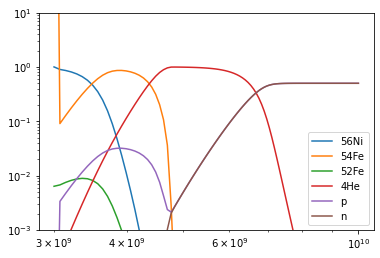

In [9]:

plt.plot(T,X[:,0], label = '56Ni')
plt.plot(T,X[:,1], label = '54Fe')
plt.plot(T,X[:,2], label = '52Fe')
plt.plot(T,X[:,3], label = '4He')
plt.plot(T,X[:,4], label = 'p')
plt.plot(T,X[:,5], label = 'n')
plt.yscale('log') 
plt.xscale('log')
plt.ylim(1e-3, 10)
plt.legend()
